# Inferential Statistics Project: Investigation of TMDb Movie Dataset

***by Maneesh Divana for Udacity's Machine Learning Foundation Nanodegree***

-----

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

-----

<a id='intro'></a>
## Introduction

Dataset selected is the TMDb Movie Dataset which contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
# Importing pandas, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Questions to be answered

#### Single Variable Exploration:

<ol>
    <li style="padding:5px"><a href="#q1">Which movies had most and least profit?</a></li>
    <li style="padding:5px"><a href="#q2">Which is the longest running and shortest running movie?</a></li>
    <li style="padding:5px"><a href="#q3">Which movies have the highest budget and lowest budget?</a></li>
    <li style="padding:5px"><a href="#q4">What is the average and the most frequent runtime?</a></li>
    <li style="padding:5px"><a href="#q5">Which director has directed the most movies?</a></li>
</ol>

#### Multi Variable Exploration:
<ol start="6">
    <li style="padding:5px"><a href="#q6">How profit varied over the years and which year saw movies making the most profit?</a></li>
    <li style="padding:5px"><a href="#q7">How revenue varies based on popularity?</a></li>
    <li style="padding:5px">
        <a href="#q8">What are the overlapping properties associated with movies that have high profits (profit > 50 million USD)?</a>
        <ol type="a">
            <li style="padding:3px"><a href="#q8a">Top 5 Genres earning > 50 million in profit?</a></li>
            <li style="padding:3px"><a href="#q8b">Top 5 Directors whose movies have earned > 50 million in profit?</a></li>
            <li style="padding:3px"><a href="#q8c">Average Runtime of movies earning > 50 million in profit?</a></li>
            <li style="padding:3px"><a href="#q8d">Top 5 Actors whose movies have earned > 50 million in profit?</a></li>
            <li style="padding:3px"><a href="#q8e">Average Budget of movies earning > 50 million in profit?</a></li>
            <li style="padding:3px"><a href="#q8e">Which release months are more profitable?</a></li>
        </ol>
    </li>
</ol>

-----

<a id='wrangling'></a>
## Data Wrangling


### General Properties

**Loading the dataset, peaking into it and cheking for null values and duplicates.**

In [2]:
# Read from the CSV file and load data into a Pandas DataFrame
tmdb_df = pd.read_csv("tmdb-movies.csv")
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Get the shape or dimensions of the DataFrame
tmdb_df.shape

(10866, 21)

- **The Dataset has 10866 rows and 21 columns.**
- **The dataset looks mostly clean.**

**Checking for duplicates and Null values**

In [4]:
# List duplicate values
tmdb_df[tmdb_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
# Get dataset info
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Get the number of null vaues in each column
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Fetch rows from DataFrame where budget or revenue is zero 
tmdb_df.query("budget==0|revenue==0").head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04


In [8]:
# Fetch rows from DataFrame where runtime is zero 
tmdb_df.query("runtime==0").head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


In [9]:
# Number of entries where budget or revenue or runtime is zero
len(tmdb_df.query("budget==0|revenue==0|runtime==0").index)

7011

So there are 7011 rows where budget or revenue or runtime is zero

### Observations made on the dataset

**Looking at the data we can see that:** 

- No currency type have been mentioned for columns `budget`, `revenue`. We will be assuming it to be US Dollars.


- `vote_count` is different for each movie. So it will be unreliable to conclude the popularity of the movies based on the average vote count `vote_average`.


- There are some columns like `id`, `imdb_id`, `homepage`, `overview`, `tagline`, `keywords`, `production_companies` which are not needed for us. So will drop those columns.


- There is a single duplicated entry. Will remove the row.


- Some columns of our interest like `genres`, `director`, `cast` have ***NaN*** values in them. So will remove those entries.


- Some movies in the database have zero budget or zero revenue, their values have not been recorded. So will remove those entries.


- The `runtime` column has some values as zero. So will remove those entries.


- The `release_date` column is in string format. So will be converting it into datetime/timestamp.

### Data Cleaning

**Dropping Columns that are not needed**

In [10]:
# Dropping the Columns which are not needed from the DataFrame
to_delete_cols = ["id", "imdb_id", "homepage", "overview", "tagline",
                  "keywords", "production_companies", "budget_adj", "revenue_adj",
                  "vote_count", "vote_average"]
tmdb_df.drop(to_delete_cols, axis=1, inplace=True)
tmdb_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [11]:
# Get the number of null vaues in each column
tmdb_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

**Dropping the duplicate entries**

In [12]:
# Drop duplicate rows
initial_row_count = len(tmdb_df.index.tolist())

tmdb_df.drop_duplicates(inplace=True)

final_row_count = len(tmdb_df.index.tolist())
print("{} duplicate rows were dropped.".format(initial_row_count - final_row_count))

1 duplicate rows were dropped.


**Dropping the rows in which genre, director, cast columns contain NaN values**

In [13]:
# Drop null valued rows
initial_row_count = len(tmdb_df.index.tolist())

cols_of_interest = ['genres', 'director', 'cast']
tmdb_df.dropna(subset=cols_of_interest, inplace=True)

final_row_count = len(tmdb_df.index.tolist())
print("{} rows having NaN values were dropped.".format(initial_row_count - final_row_count))

134 rows having NaN values were dropped.


In [14]:
# Get the number of null vaues in each column
tmdb_df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

We have removed the rows with *NaN* values in the columns of interest.

Now as observed before there are some rows which have `runtime`, `budget` and `revenue` as zero. So we will drop those rows.

**Dropping rows where `runtime`, `budget` or `revenue` is zero**

In [15]:
# Dropping rows where cell value is 0 for our columns of interest
indices_to_delete = tmdb_df.query("budget==0|revenue==0|runtime==0").index
tmdb_df.drop(indices_to_delete, inplace=True)
print("{} rows dropped which had cell values as zero for budget or revenue or runtime".format(len(indices_to_delete)))

6882 rows dropped which had cell values as zero for budget or revenue or runtime


In [16]:
# Verify if any rows remain where budget or revenue or runtime is zero
tmdb_df.query("budget==0|revenue==0|runtime==0")

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year


We have dropped rows which have cell values as zero in columns of our interest.

**Converting the `release_date` column to datetime format**

In [17]:
# Convert the release_date column to datetime
tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])

In [18]:
# Get overview of DataFrame
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3849 non-null float64
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
release_year      3849 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 330.8+ KB


The `release_date` column has been converted to datetime format. And there are no null entries.

**Now our dataset is clean and all columns are in the required datatypes.**

### Cleaned Data

In [19]:
tmdb_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


In [20]:
# Get the shape or dimensions of the DataFrame
tmdb_df.shape

(3849, 10)

**Our cleaned data has 3849 rows and 10 columns.**

-------------

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1:  Which movie had the most and least profit?

In [21]:
# Defining a function to get the lowest and the highest value and compare them, given a column in df
def compare_high_low(column):
    # Fetch the highest value and lowest value indexes in the column
    high_idx = column.idxmax()
    low_idx = column.idxmin()
    
    # Get the highsest and lowest value dfs
    high_df = pd.DataFrame(tmdb_df.loc[high_idx])
    low_df = pd.DataFrame(tmdb_df.loc[low_idx])
    
    # return the concatinated df to compare
    return pd.concat([high_df, low_df], axis=1)

In [22]:
# Getting the most and the least profit movies
# Caculating the profit of movies
tmdb_df["profit"] = tmdb_df.revenue - tmdb_df.budget

# Get the highest and lowest profit for movies
compare_high_low(tmdb_df["profit"])

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


#### The movie *`Avatar`* has the most profit earning 2,544,505,847 USD in profit against a budget of 237,000,000 USD.

#### The movie *`The Warrior's Way`* has the least profit losing 413,912,431 USD against a budget of 425,000,000  USD.

----------

<a id='q2'></a>
### Research Question 2:  Which is the longest running and shortest running movie?

In [23]:
# Getting the highest and the lowest runtime in the df
compare_high_low(tmdb_df["runtime"])

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


#### The movie *`Carlos`* is the longest running with a runtime of 338 minutes.

#### The movie *`Kid's Story`* is the shortest running with a runtime of 15 minutes.

-----

<a id='q3'></a>
### Research Question 3:  Which movies have the highest budget and lowest budget?

In [24]:
# Getting the highest and the lowest runtime in the df
compare_high_low(tmdb_df["budget"])

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


#### The movie *`The Warrior's Way `* has had the highest budget of  425,000,000 USD in our dataset. As we have found out in question 1 it also earned the least profit.

#### The movie *`Lost & Found`* has the least budget of  1 USD and has earned  99 USD in profit.

------

<a id='q4'></a>
### Research Question 4:  What is the average and the most frequent runtime?

In [25]:
# Most frequently used runtime
most_freq_runtime = tmdb_df["runtime"].mode().iloc[0]

print("The most frequently used runtime = {} mins.".format(most_freq_runtime))

# Statistics about the data
tmdb_df["runtime"].describe()

The most frequently used runtime = 100 mins.


count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

#### The average runtime of movies in the dataset is 109.22 mins.

#### The most frequently used runtime for movies in the dataset is 100 mins.

#### The standard deviation of the runtime data is 19.9 mins.

#### The Inter Quartile Range (IRQ) is (95 mins, 119 mins)

#### Visualizing the distribution of runtimes using histogram:

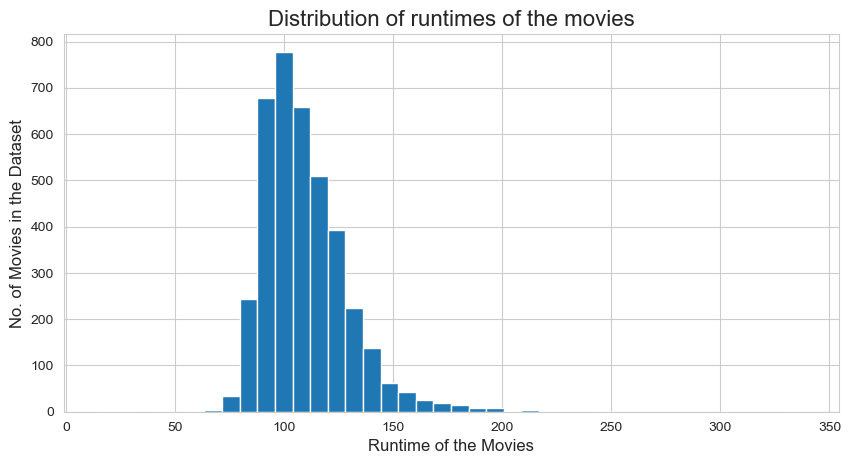

In [26]:
# Creating a histogram using pyplot from matplotlib
plt.figure(figsize=(10, 5), dpi = 100)

# Set the x-axis label
plt.xlabel('Runtime of the Movies', fontsize = 12)

# Set the y-axis label
plt.ylabel('No. of Movies in the Dataset', fontsize=12)

# Set the title for the graph
plt.title('Distribution of runtimes of the movies', fontsize=16)

# Declare the histogram
plt.hist(tmdb_df['runtime'], bins=40)

# Display the graph
plt.show()

**The above distribution is positively skewed and most of the movie runtimes fall between 80 to 120 mins.**

---------------

<a id='q5'></a>
### Research Question 5:  Which director has directed the most movies?

In [27]:
# A function to get the value counts of a column given a df
def get_counts(df, column):
    # First concatenating the col values with | separator
    col_series = df[column].str.cat(sep='|')
    
    # Splitting them and creating a series
    col_series = pd.Series(col_series.split('|'))
    
    # Getting the number of occurances using value_counts method
    count = col_series.value_counts(ascending=False)
    
    return count

In [28]:
# Get the top 5 most frequent directors
get_counts(tmdb_df, "director")[:5]

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
dtype: int64

#### So Steven Spielberg has directed the most movies (28) followed  by Clint Eastwood directing 24 movies.

#### Visualizing using a horizontal bar graph

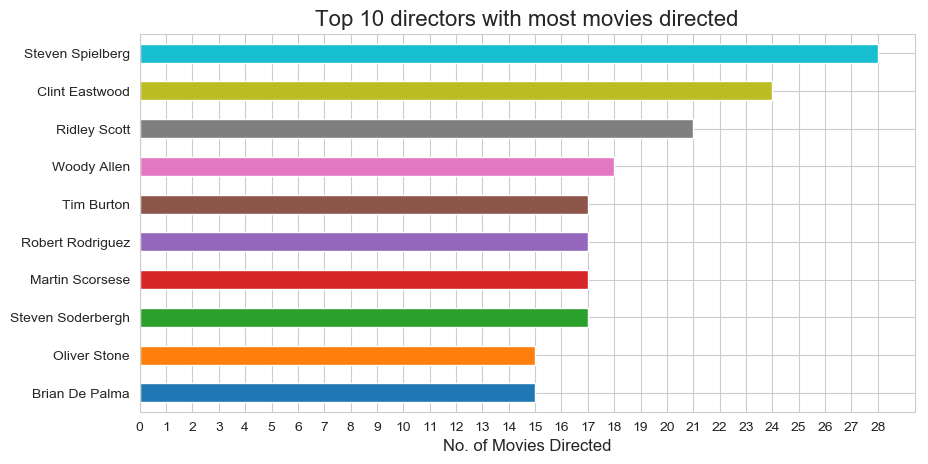

In [29]:
data = get_counts(tmdb_df, "director")[:10]
data.sort_values(ascending=True, inplace=True)

# Creating a bar graph using pyplot from matplotlib
plt.figure(figsize=(10, 5), dpi=100)

# Set the x-axis label
plt.xlabel('No. of Movies Directed', fontsize = 12)

# Set the xticks
plt.xticks(list(range(0, data[-1] + 1)))

# Set the title for the graph
plt.title('Top 10 directors with most movies directed', fontsize=16)

# Declare the graph
data.plot.barh()

# Display the graph
plt.show()

**The above bar graph shows us the top 10 directors who have directed the most movies. Stevem Spielberg tops the list directing 28 movies.**

-----

<a id='q6'></a>
### Research Question 6: How profit varied over the years and which year saw movies making the most profit?

To see how profit varied over the years, let us group the datafarme based on `release_year` and then sum up the profits of mvies released that year.

In [30]:
# Using groupby and sum to get the profits per release year
rel_prof_df = tmdb_df.groupby(["release_year"]).agg({"profit": ["sum"]})

# Reseting the index and renaming the aggregated colum
rel_prof_df.reset_index(inplace=True)
rel_prof_df.columns = ["release_year", "profit"]

# Sorting the dataframe in decendig order of profit
rel_prof_df.sort_values("profit", ascending=False, inplace=True)

# Top 5
rel_prof_df.head()

,release_year,profit
55,2015,19032145273
54,2014,16676201357
52,2012,16565945507
53,2013,15782743325
51,2011,14966694704


**The year 2015 saw movies making the most profit.**

**Let us visualize this using a line graph:**

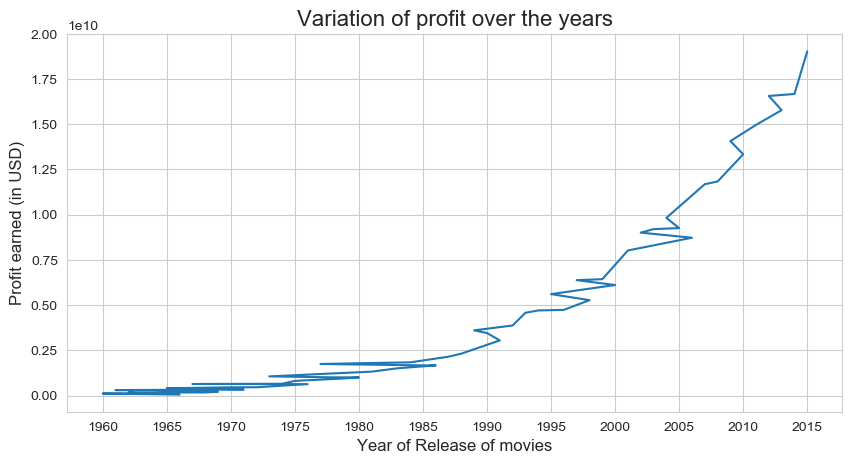

In [31]:
# Creating a line graph using pyplot from matplotlib
plt.figure(figsize=(10, 5), dpi=100)

# Set the x-axis label
plt.xlabel('Year of Release of movies', fontsize = 12)

# Set the y-axis label
plt.ylabel('Profit earned (in USD)', fontsize = 12)

# Set the title for the graph
plt.title('Variation of profit over the years', fontsize=16)

# Set the x-ticks
mini = rel_prof_df.release_year.min()
maxi = rel_prof_df.release_year.max() + 10
plt.xticks(list(range(mini, maxi, 5)))

# Declare the graph
plt.plot("release_year", "profit", data=rel_prof_df)

# Display the graph
plt.show()

**The above graph shows an increasing profit in the recent decade. This is expected as marketing techniques have evolved, social media has influenced heavily on how a movie is publicized and hollywood movies releasing in many countries world-wide.**

--------------

<a id='q7'></a>
### Research Question 7:  How revenue varies based on popularity?

**To see how revenue varies based on popularity let us use `Pearson's co-effecient(r) method`.**

>r < 0 indicates inverse relation between two variables, r == 0 indicates that the variables are independent and r > 0 indicates a positive relation between two variables

In [32]:
# Select only the popularity and the runtime columns from dataset.
runtime_popu = tmdb_df[["popularity", "revenue"]]

# Using Pearsons Co-effecient method to get Correlation
corr_df = runtime_popu.corr(method="pearson")

corr_df

,popularity,revenue
popularity,1.000000,0.615348
revenue,0.615348,1.000000


#### The Pearson's r value between revenue and popularity is ~ `0.62`, indicating a direct proportionality between them.

#### Based on the above data, revenue will rise with rising popularity. But we cannot outrightly say this, as a movie which is not so popular can still earn more revenue due to other factors like number of countries released,  the promotion and publicity done etc. 

#### Let us visualize this with a correlation graph:

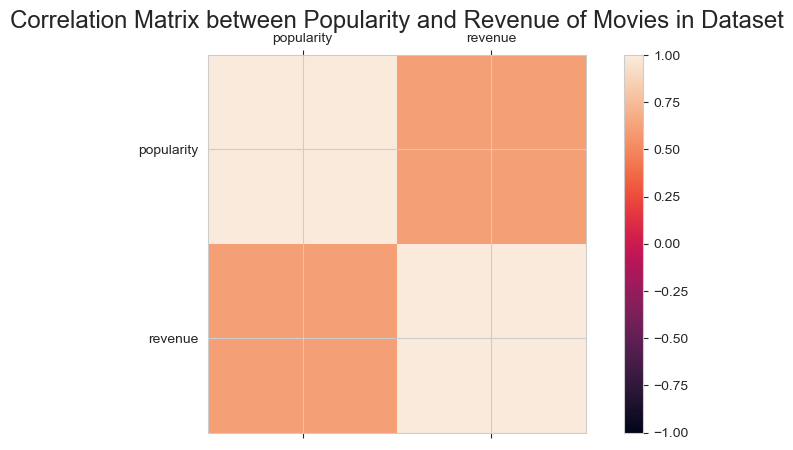

In [33]:
# Creating a correlation matrix using pyplot from matplotlib
fig, axes = plt.subplots(figsize=(10, 5), dpi=100)
axes.set_title("Correlation Matrix between Popularity and Revenue of Movies in Dataset", ha='center', fontsize='xx-large')
cax = axes.matshow(corr_df, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,2,1)
axes.set_xticks(ticks)
axes.set_yticks(ticks)
axes.set_xticklabels(corr_df.columns)
axes.set_yticklabels(corr_df.columns)

# Display the graph
plt.show()

---------

<a id='q8'></a>
### Research Question 6:  What are the overlapping properties associated with movies that have high profits (profit > 50 million USD)?

Let us get only the movies which have made more than 50 million in profit and explore our questions

In [34]:
profit_df = tmdb_df.query("profit>50000000").sort_values("profit", ascending=False)

In [35]:
profit_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [36]:
len(profit_df.index)

1338

There are 1338 movies which have earned more than 50 million in profit


***Lets us explore the overlapping properties associated with movies that have made profit of atleast 50 million USD:***

<a id='q8a'></a>
#### A. Top 5 Genres earning > 50 million in profit?

In [37]:
# Get the top 5 most frequent genres using the method we declared above
get_counts(profit_df, "genres")[:5]

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

These are the Top 5 Genres earning atleast 50 million USD in profit.

<a id='q8b'></a>
#### B. Top 5 Directors whose movies have earned > 50 million in profit?

In [38]:
# Get the top 5 most frequent genres using the method we declared above
get_counts(profit_df, "director")[:5]

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

These are the Top 5 Directors earning atleast 50 million USD in profit.

<a id='q8c'></a>
#### C. Average Runtime of movies earning > 50 million in profit?

In [39]:
# Get the average runtime of movies earning > 50 million profit
profit_df.runtime.mean()

113.66741405082212

113.67 ~ 114 mins is the average runtime of movies earning atleast 50 million USD in profit.

<a id='q8d'></a>
#### D. Top 5 Actors whose movies have earned > 50 million in profit?

In [40]:
# Get the top 5 most frequent actor using the method we declared above
get_counts(profit_df, "cast")[:5]

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

These are the Top 5 Actors earning atleast 50 million USD in profit.

<a id='q8e'></a>
#### E. Average budget of movies earing > 50 million in profit?

In [41]:
# Get the average budget of movies earning > 50 million profit
profit_df.budget.mean()

60444957.76083707

The average budget of movies earning atleast 50 million in profit is ~ 60 million USD. 

<a id='q8f'></a>
#### F. Which release months are more profitable?

In [42]:
# Using groupby on release_date to get profits in release months
# Set df index as release_date
new_df = profit_df.set_index('release_date')

# Groupby release month
monthly_prof = new_df.groupby([new_df.index.month]).agg({"profit": ["sum"]})

# Renaming aggregated column and index
monthly_prof.index.name = "release_month"
monthly_prof.columns = ["profit"]

monthly_prof

,profit
release_month,
1,6379416607
2,9739829445
3,17137507412
4,14955033394
5,33718411507
6,41646750096
7,28365057447
8,12534493365
9,13088138930


**Visualizing the above data using bar graph:**

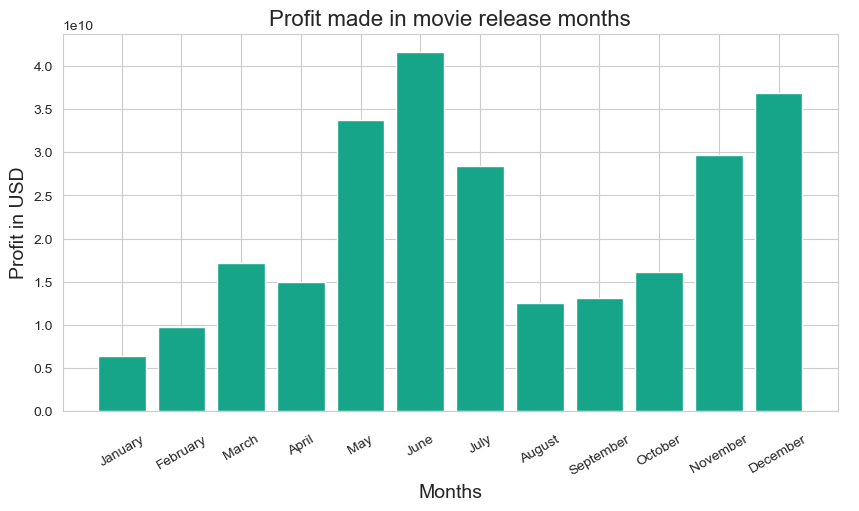

In [43]:
# Creating a bar graph using pyplot from matplotlib
plt.figure(figsize=(10, 5), dpi=100)

# Set the x-axis label
plt.xlabel('Months', fontsize = 14)

# Set the y-axis label
plt.ylabel('Profit in USD', fontsize = 14)

# Set the title for the graph
plt.title('Profit made in movie release months', fontsize=16)

# Set x-ticks names
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(monthly_prof.index.tolist(), month_list)
plt.tick_params(axis="x", rotation = 30, size = 12)

# Declare the graph
plt.bar(x=monthly_prof.index, height=monthly_prof.profit, color="#17a589")

# Display the graph
plt.show()

**The above graph shows us that movies released in June have made most profits followed by December, May and July. The high profits during May, June and July coincides with the Summer Break in most places and Thanksgiving and Christmas holidays during November and December.**

-----

<a id='conclusions'></a>
## Conclusions

#### So based on the exploration done so far,

- `Avatar` is the highest grossing movie.


- `The Warrior's Way` is the lowest grossing movie.


- The average runtime of movies is `~ 109  mins` and average runtime of movies grossing profit > 50 million USD is `~ 114 mins`.


- The most popular/frequently used runtime is `100 mins`.


- The year `2015` saw the movies make an all time hight in profits.

#### For a movie to be successful/earn > 50 million in profit:

- The movie runtime must be around `114 minutes`.


- The movie must have a budget of atleast `60 million USD`.


- The movie must belong to one of these genres: `Comedy`, `Drama`, `Action`, `Thriller`, `Adventure`.


- The movie must be directed by one of these: `Steven Spielberg`, `Robert Zemeckis`, `Clint Eastwood`, `Tim Burton`, `Ron Howard`.


- The movie must have one of these as cast member: `Tom Cruise`, `Brad Pitt`, `Tom Hanks`, `Sylvester Stallone`, `Cameron Diaz`.


- The movie must be released in one of these months: `July`, `December`, `May`, `November`, `July`.


#### Limitations:

- The above analysis will not guarantee a profit of atleast 50 million USD. The analysis is very topical and is stating that there is a high probabilty of earning a profit of atleast 50 million since the historical data of above combinations show high profits.

- The analysis does not take into other important factors like story of the movie, the subject of the movie. People might hate a movie based on who/what the movie is about.

- Also during the analysis several rows have been dropped due to missing values. If they are included the reult of the analysis may be different.

- The analysis does not take into account the possibility of collaborations. Collaborations between directors and actors can also influence the outcome.

-----